In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import vq, kmeans, whiten

import jax
import jax.numpy as jnp
from jax.config import config as jax_config

jax_config.update("jax_enable_x64", True)

In [12]:
import cryo_md

from cryo_md.data_generator import data_generator
from cryo_md.optimizer import run_optimizer
from cryo_md.analysis import calc_population_models

In [3]:
n_points = np.array([100, 300, 800])
centers = np.array([[0, 0], [0, 10], [10, 0]])

cov = np.array([[3, 0], [0, 3]])

data = data_generator(centers, cov, n_points)

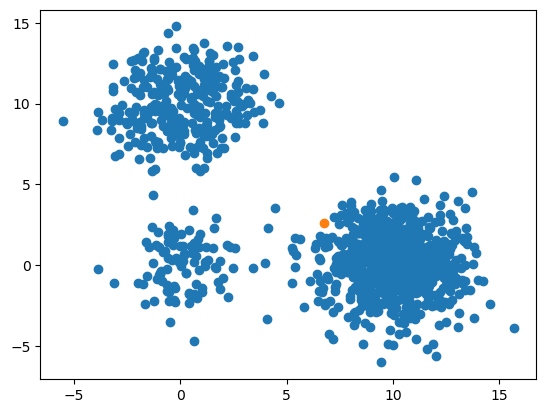

In [4]:
homo_model = np.mean(data, axis=0)

plt.scatter(data[:, 0], data[:, 1])
plt.scatter(homo_model[0], homo_model[1])

In [5]:
n_models = 20

init_models = np.repeat(homo_model.reshape(1, -1), n_models, axis=0)
# init_models[2] = np.array([-20, 0])

weights = np.ones(init_models.shape[0]) / init_models.shape[0]
prior_center = np.array([5.0, 5.0])

In [6]:
config = {
    "samp_steps": 100,
    "samp_step_size": 0.01,
    "md_force_constant": 0.0,
    "samp_bias_force": 1.0,
    "opt_steps": 1000,
    "opt_step_size": 0.1,
    "batch_size": 100,
    "sigma": 1.0,
    "gamma": 1.0 / 10,
    "delta_sigma": 1,
    "stride": 100,
}

cryo_md.utils.check_config(config)

In [7]:
traj_struct, traj_weights = run_optimizer(
    init_models, weights, data, prior_center, config
)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


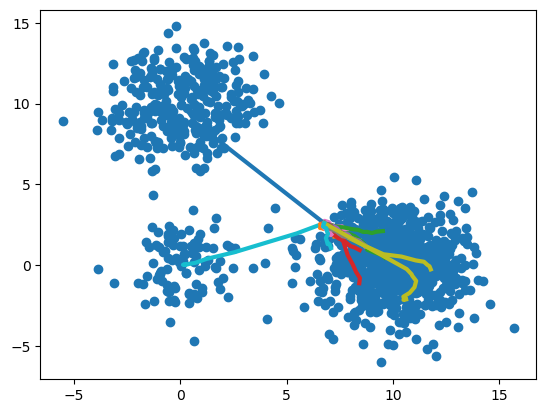

In [8]:
plt.scatter(data[:, 0], data[:, 1])

for i in range(traj_struct.shape[1]):
    plt.plot(traj_struct[:, i, 0], traj_struct[:, i, 1], linewidth=3)

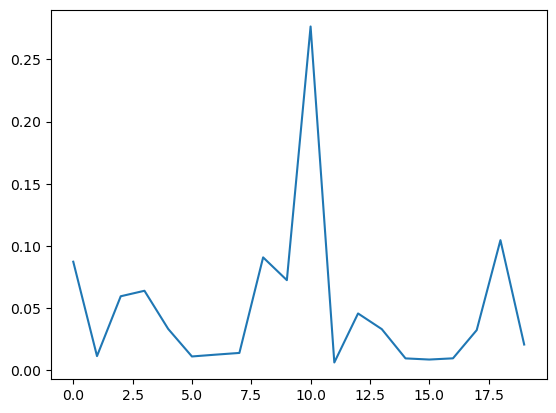

In [9]:
plt.plot(traj_weights[-1, :])

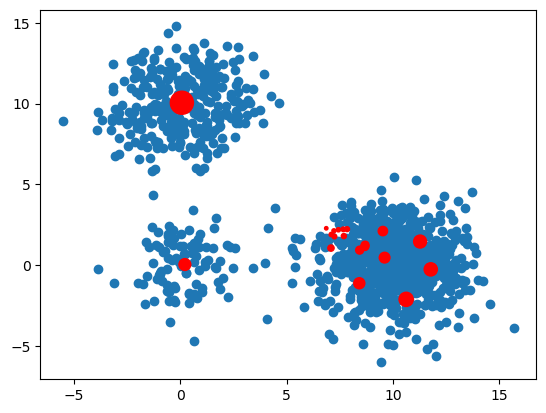

In [10]:
plt.scatter(data[:, 0], data[:, 1])

plt.scatter(
    traj_struct[-1, :, 0],
    traj_struct[-1, :, 1],
    color="red",
    s=traj_weights[-1, :] * 1000,
)

In [14]:
calc_population_models(traj_struct[-1], traj_weights[-1], data, n_clusters=3)

Obtained: 0.072, Data: 0.083
Obtained: 0.277, Data: 0.251
Obtained: 0.651, Data: 0.667
